In [15]:
#Necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading data
test = pd.read_csv('Data/Test.csv')
train = pd.read_csv ('Data/Train.csv')
definitions = pd.read_csv('Data/VariableDefinitions.csv')
sample =pd.read_csv('Data/SampleSubmission.csv')

In [5]:
# Variable definitions
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [9]:
# Submission sample template
'''
The likelihood of the person having a bank account or not (Yes = 1, No = 0)
'''
sample.head(7)

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
5,uniqueid_6 x Kenya,0
6,uniqueid_7 x Kenya,0


# Understanding the dataset

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [10]:
# Shape of the training and testing set
print('Training set shape: ', train.shape)
print('Testing set shape: ', test.shape)

Training set shape:  (23524, 13)
Testing set shape:  (10086, 12)


In [12]:
#Check for missing data
missing = train.isnull().sum()
missing

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [105]:
#check for duplicates
duplicates =train.duplicated( )
duplicates[duplicates == True] # display if there duplicates

Series([], dtype: bool)

In [58]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


##### Explore the country column

In [13]:
#Check for the countries involved
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

<Axes: xlabel='country', ylabel='count'>

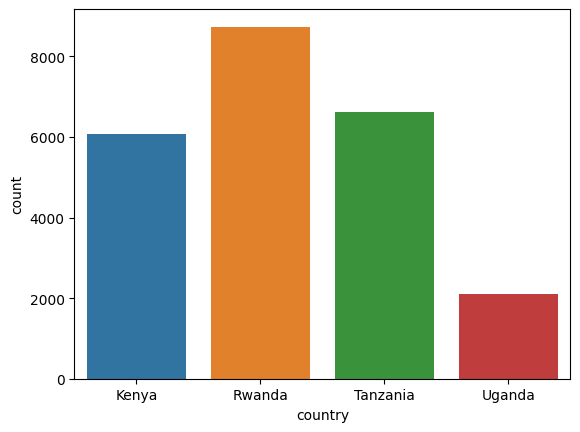

In [17]:
# Explore the country distribution using a countplot for visualization
sns.countplot(train, x ='country')

##### Explore the year column

In [21]:
train['year'].unique()

array([2018, 2016, 2017], dtype=int64)

<Axes: xlabel='year', ylabel='count'>

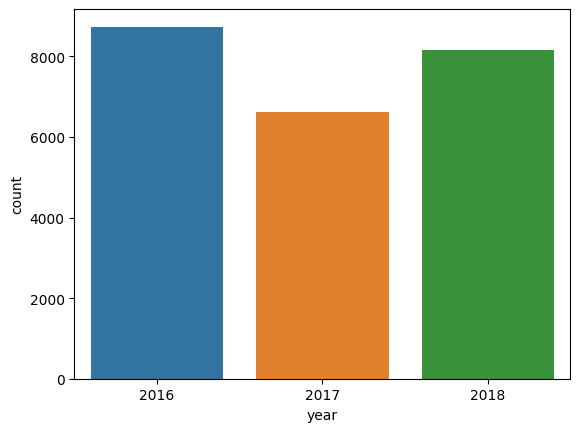

In [23]:
sns.countplot(train, x='year')

##### Explore the location column

In [24]:
train['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

<Axes: xlabel='location_type', ylabel='count'>

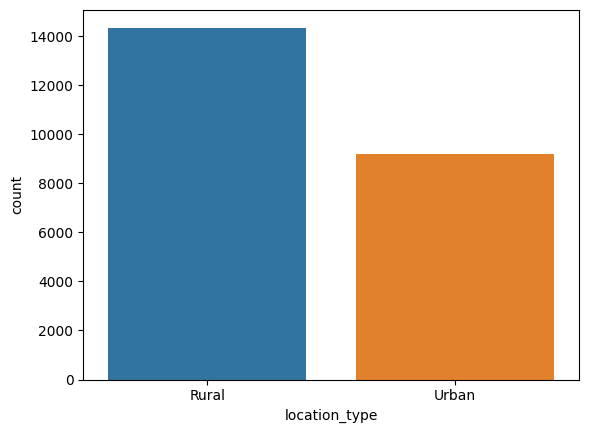

In [25]:
sns.countplot(train, x='location_type')

##### Explore cellphone access


Text(0.5, 1.0, 'Cell phone access')

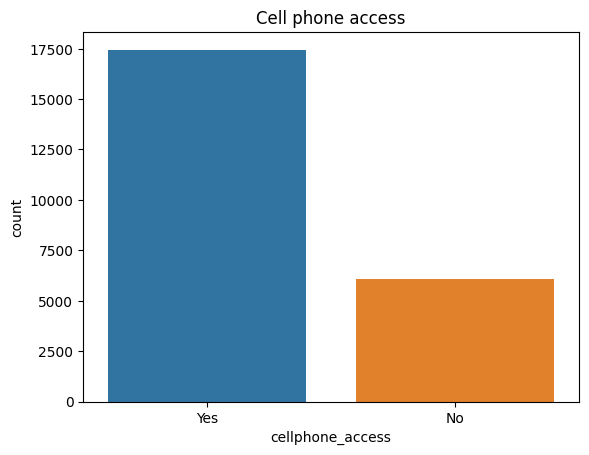

In [106]:
sns.countplot(train, x= 'cellphone_access')

plt.title('Cell phone access')

##### Explore the household size 

In [26]:
train['household_size'].unique()

array([ 3,  5,  8,  7,  1,  6,  4, 10,  2, 11,  9, 12, 16, 15, 13, 14, 21,
       18, 17, 20], dtype=int64)

Text(0.5, 1.0, 'Household size distribution plot')

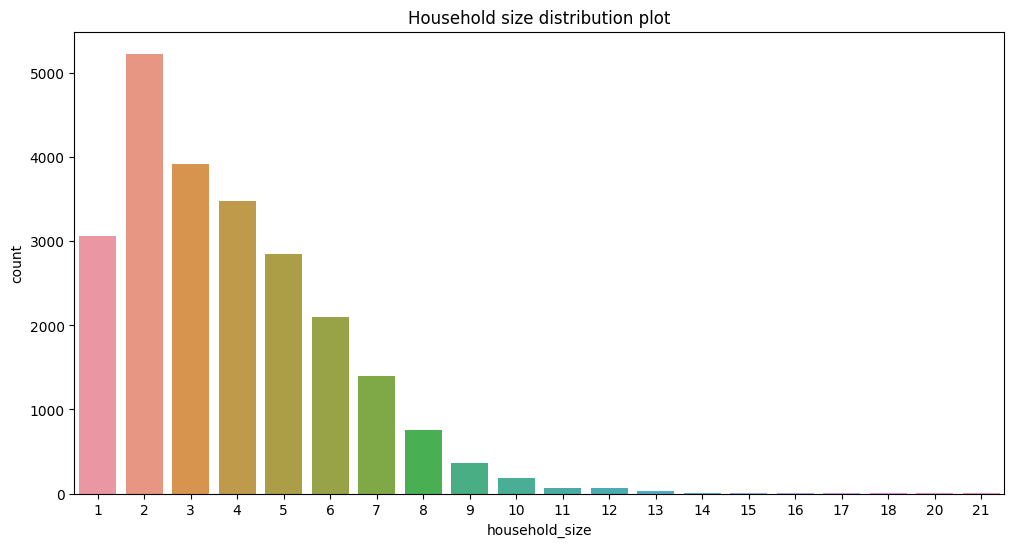

In [76]:
plt.figure(figsize =(12,6))

sns.countplot(train, x= 'household_size')

plt.title('Household size distribution plot')

Text(0.5, 1.0, 'Household size distribution plot')

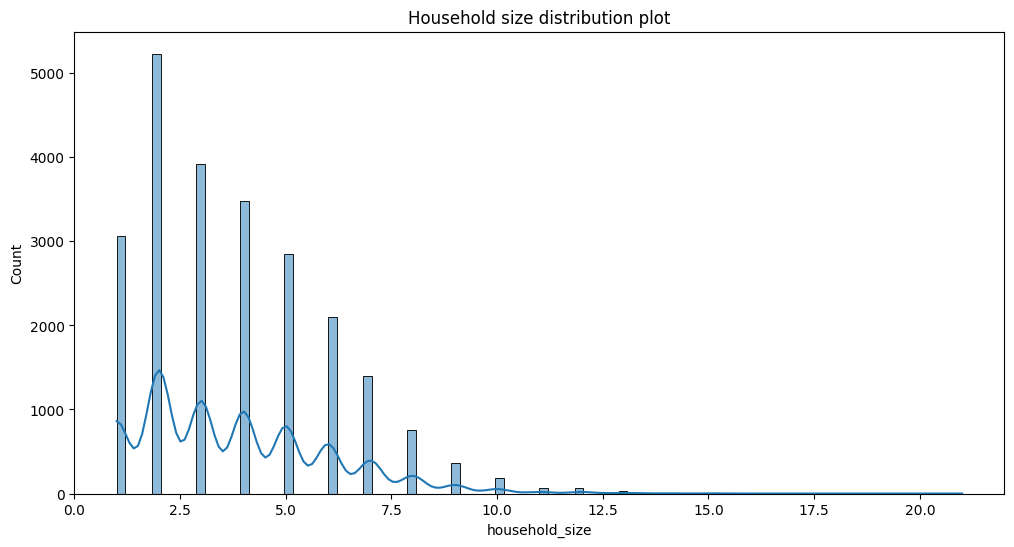

In [75]:
# Alternativel: histogram plot
plt.figure(figsize =(12,6))
sns.histplot(data = train, x ='household_size', kde= True)

plt.title('Household size distribution plot')


##### Explore age

In [31]:
train['age_of_respondent'].unique()

array([ 24,  70,  26,  34,  32,  42,  54,  76,  40,  69,  64,  31,  38,
        47,  27,  48,  25,  21,  18,  22,  58,  55,  62,  29,  35,  45,
        67,  19,  80,  66,  50,  33,  28,  51,  16,  17,  30,  37,  59,
        65,  46,  56,  52,  23,  43,  49,  44,  72,  53,  63,  39,  81,
        78,  36,  20,  60,  95,  71,  57,  85,  68,  41,  61,  75,  86,
        73,  93,  74,  88,  90,  77,  84,  82,  89,  79,  83,  94,  87,
        92,  91,  98,  97,  96,  99, 100], dtype=int64)

Text(0.5, 1.0, 'Distribution plot of the age of respondents')

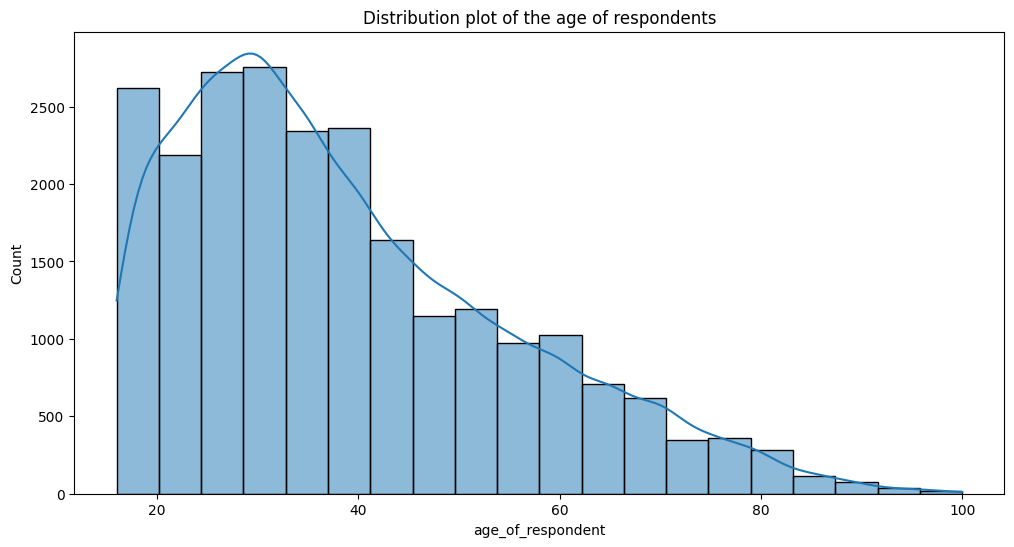

In [74]:
# Age distribution plot
plt.figure(figsize =(12,6))

sns.histplot(train, x ='age_of_respondent' ,bins=20, kde=True)

plt.title('Distribution plot of the age of respondents')

Text(0.5, 1.0, ' Box plot for the age distribution of the resondents')

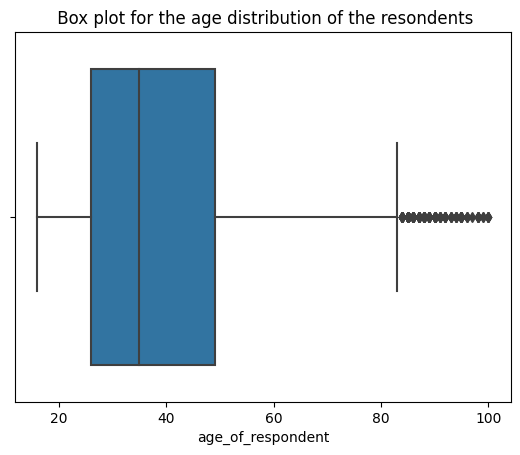

In [69]:
# Boxplot 
sns.boxplot(data = train, x='age_of_respondent')

plt.title(' Box plot for the age distribution of the resondents')


In [60]:
# interpreting the boxplot
train['age_of_respondent'].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

##### Explore gender

<Axes: xlabel='gender_of_respondent', ylabel='count'>

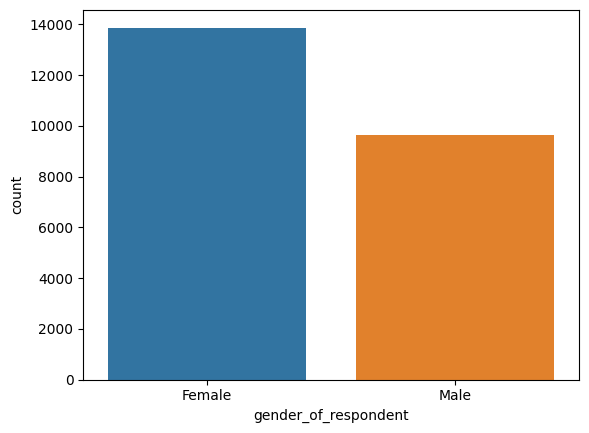

In [94]:
sns.countplot(train, x ='gender_of_respondent')

##### Explore the relationship with head

In [63]:
train['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

Text(0.5, 1.0, ' Count plot for relationship of interviewee with the head of household')

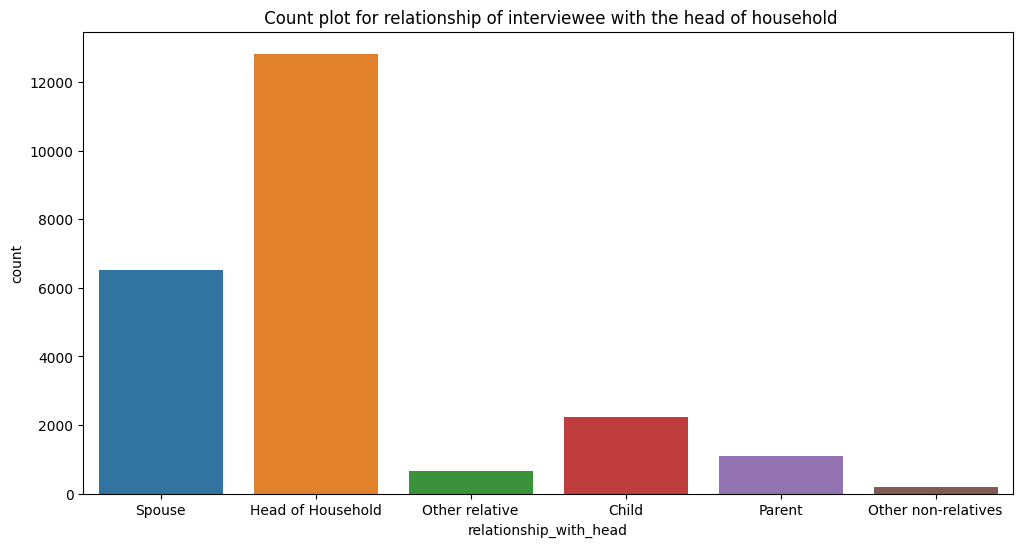

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(train, x= 'relationship_with_head')

plt.title (' Count plot for relationship of interviewee with the head of household')

##### Explore marital status

In [90]:
train['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

Text(0.5, 1.0, 'Distribution of marital status')

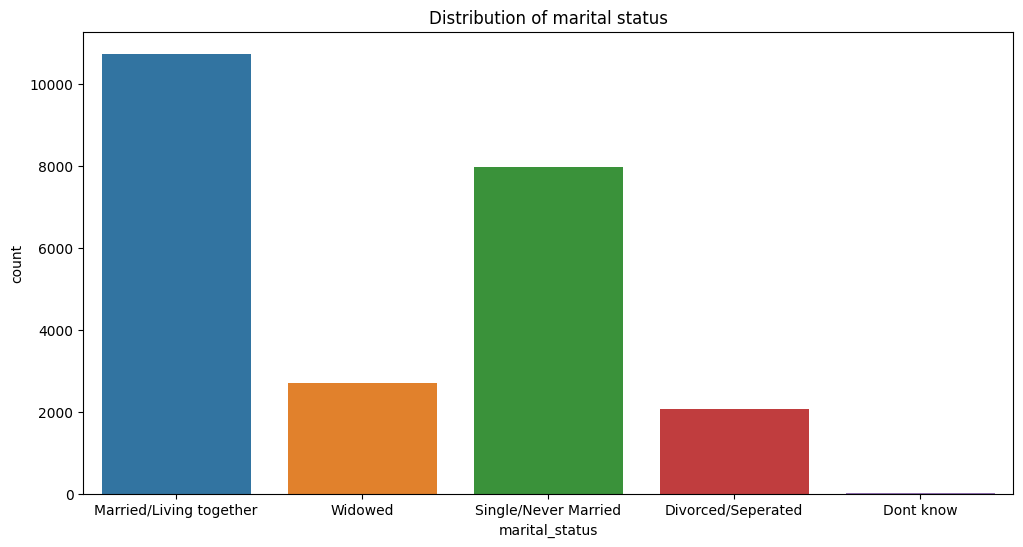

In [92]:
plt.figure(figsize = (12,6))

sns.countplot (train, x ='marital_status')

plt.title ( 'Distribution of marital status')

##### Explore education level

In [77]:
train['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

Text(0.5, 1.0, 'Countplot for the education level category')

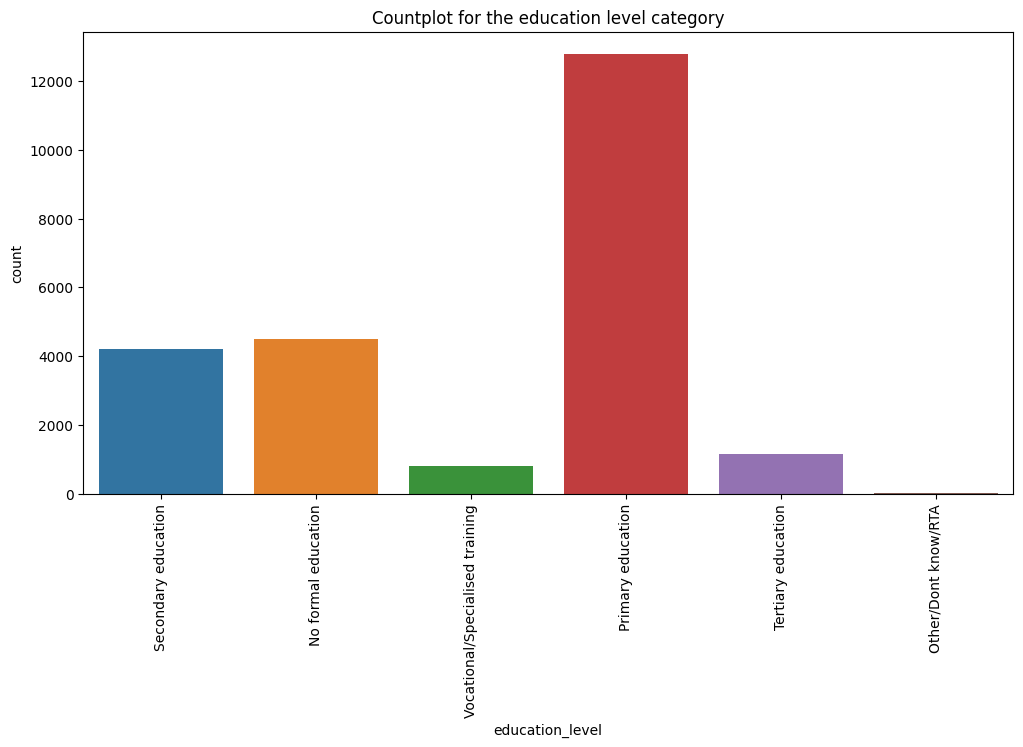

In [87]:
plt.figure(figsize = (12,6))

sns.countplot (train, x ='education_level')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

plt.title ( 'Countplot for the education level category')

##### Explore job type

In [82]:
train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

Text(0.5, 1.0, 'Various jobs')

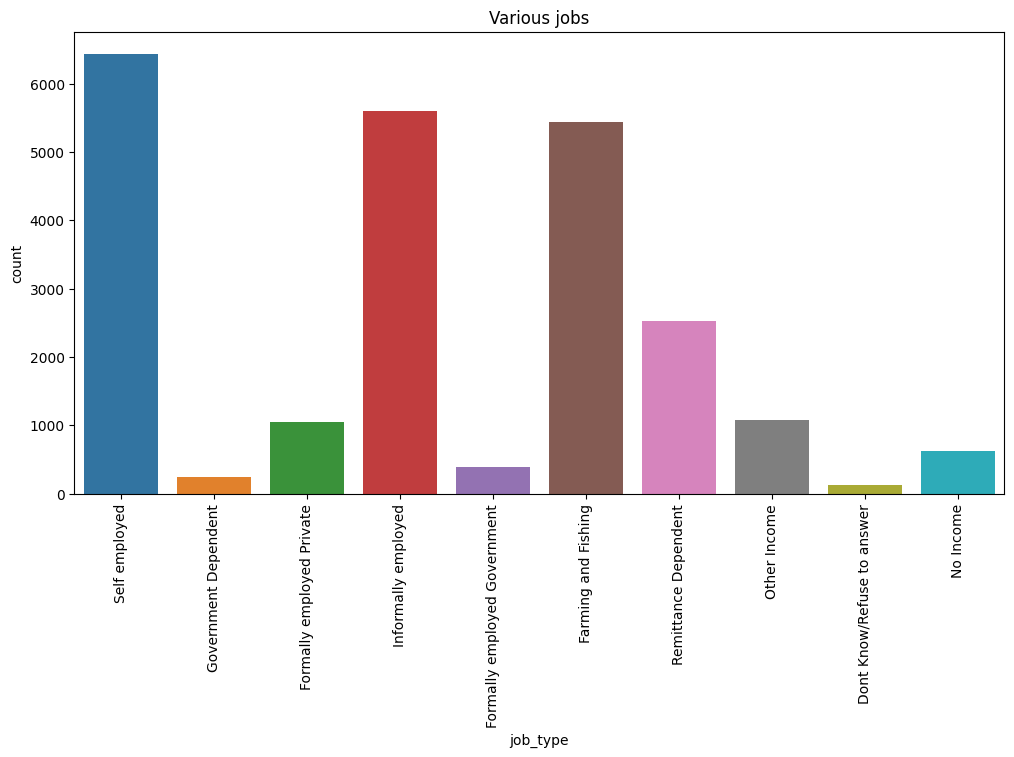

In [89]:
plt.figure (figsize = (12,6))

sns.countplot(train, x ='job_type')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

plt.title('Various jobs')

### Correlation plot

C:\Users\gitom\AppData\Local\Temp\ipykernel_6580\1489569648.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


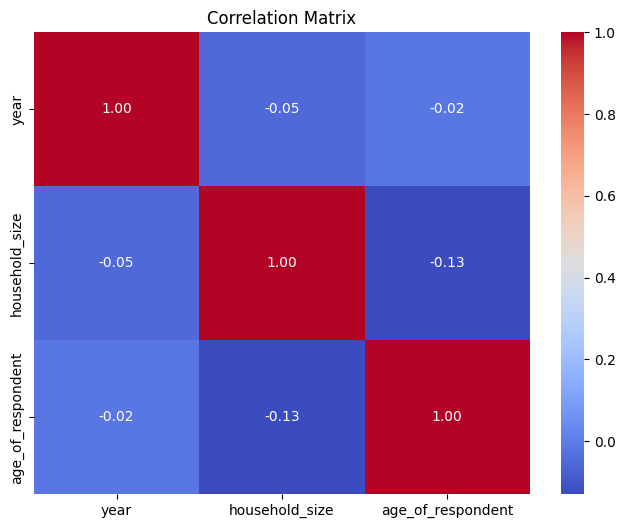

In [95]:
# Calculate correlation matrix
corr_matrix = train.corr()

# Create correlation matrix plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Annotate with correlation coefficients

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

## Data Preprocessing and Feature Engineering

In [98]:
# Categorical columns
train.select_dtypes(include=['object']).columns


Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [100]:
#Numerical columns
train.select_dtypes(include =['int']).columns

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

#### Handling categorical data
There are two types of categorical data:<br>
- **Nominal Data** <br>
In nominal data, the categories do not have a specific order. Changing the order does not affect the narure of the data. For example gender,color,country,city etc are nominal data.<br>

- **Ordinal Data** <br>
The categories in an ordinal data have a specific order and changing that order can affect the data. For example standard (1st, 2nd, 3rd etc), grade (A,B,C..) have levels and so, are ordinal data
